In [1]:
import itertools as it
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sdeint

In [2]:
from scipy import stats
from scipy.integrate import quad

400.0
CPU times: user 14.1 s, sys: 5.69 ms, total: 14.2 s
Wall time: 14.2 s


Text(0.5, 1.0, 'Solution of the FPU chain dynamics $q_{55}$')

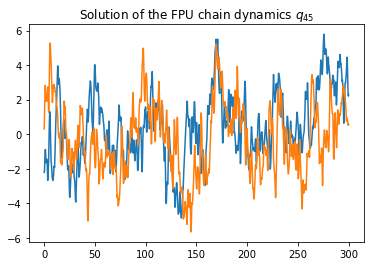

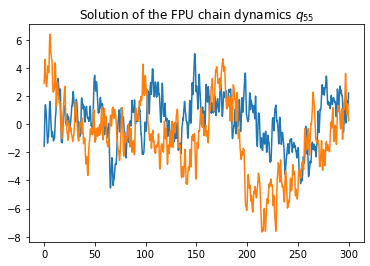

In [4]:
%%time

###### Parameters 
mag=1              # Magnitude of the coupling
beta=1             # Inverse temperature 
alpha=1            
gamma=1            # Anharmonic potential U(x)=alpha/2* x^2  + gamma/4* x^4
N=100              # Total number of oscillators in the chain 
N_mid=int(N/2)     # Coordinate of the center CG-oscillator 
dt=0.01 
delta_t=0.1
batch = 20
sec_length = 800

Time = 5*delta_t*sec_length
print(Time)
length=int(Time/dt)+1
t = np.linspace(0,Time,length) # define time axis
gap=int(delta_t/dt)
t_store=t[0:-1:gap]



# (q45,q55)
q45_store = np.zeros([t_store.size+1,batch])    
q55_store = np.zeros([t_store.size+1,batch])

q=np.zeros((1,length)) 

p1=np.zeros((N,batch))
q1=np.zeros((N,batch))
p0=np.zeros((N,batch))
q0=np.zeros((N,batch))

# solve SDE

j=1
for i in range(1,length):
    q1=q0+dt*(p0-np.roll(p0,1,axis=0))
    p1=(1-mag*dt)*p0+dt*alpha*(np.roll(q0,-1,axis=0)-q0)+dt*gamma*(np.roll(q0,-1,axis=0)**3-q0**3)+np.sqrt(2*dt*gamma/beta)*np.random.randn(N,batch)
    if i % gap ==0:
        q45_store[j,:]= np.sum(q1[0:45,:], axis=0)
        q55_store[j,:]= np.sum(q1[0:55,:], axis=0)
        j=j+1
    p0=p1
    q0=q1
                                
Toss=int(t_store.size/4)
q45_store=q45_store[Toss:-1,:] 
q55_store=q55_store[Toss:-1,:] 

# print(q49_store.shape, q50_store.shape)



plt.figure(0)
for i in range(2):
    plt.plot(t_store[Toss:]-t_store[Toss],q45_store[:,i])
plt.title(r"Solution of the FPU chain dynamics $q_{45}$")

plt.figure(1)
for i in range(2):
    plt.plot(t_store[Toss:]-t_store[Toss],q55_store[:,i])
plt.title(r"Solution of the FPU chain dynamics $q_{55}$")

Text(0.5, 1.0, 'Solution of the FPU chain dynamics $q_{55}$')

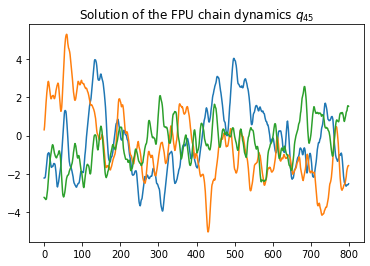

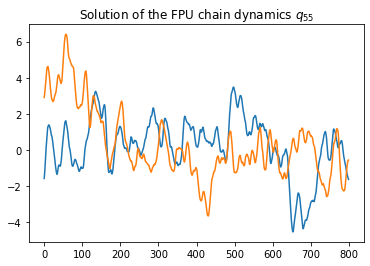

In [5]:
plt.figure(0)
for i in range(3):
    plt.plot(q45_store[0:sec_length,i])
plt.title(r"Solution of the FPU chain dynamics $q_{45}$")

plt.figure(1)
for i in range(2):
    plt.plot(q55_store[0:sec_length,i])
plt.title(r"Solution of the FPU chain dynamics $q_{55}$")

In [6]:
def acf(x):
    lags = np.arange(x.shape[0])
    corr = np.zeros(x.shape[0])
    for i,lag in enumerate(lags):
        if lag==0:
            u = v = x
        elif lag<x.shape[0]:
            u,v = x[:-lag,...], x[lag:,...]
        else:
            continue
        corr[i] = np.sum(u*v)/np.sqrt(np.sum(np.square(u))*np.sum(np.square(v)))
        
    return corr  

In [114]:
acf1=acf(q45_store[0:sec_length*2,1])

In [115]:
acf1.shape

(1600,)

Text(0.5, 1.0, 'Solution of the FPU chain dynamics $q_{45}$')

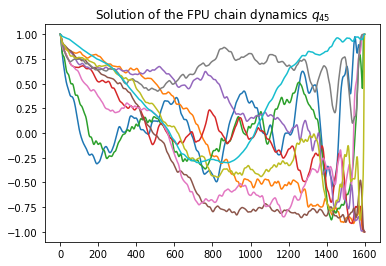

In [7]:
for i in range(10):
    plt.plot(acf(q45_store[0:sec_length*2,2*i]))
plt.title(r"Solution of the FPU chain dynamics $q_{45}$")

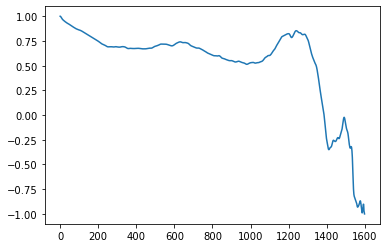

In [8]:
plt.plot(acf(q45_store[0:sec_length*2,-1]))

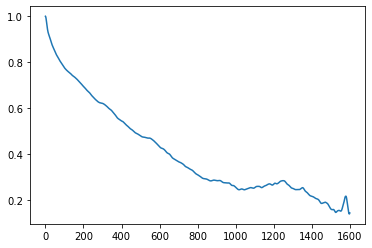

In [9]:
plt.plot(acf(q55_store[0:sec_length*2,:]))

Text(0.5, 1.0, 'Solution of the FPU chain dynamics $q_{45}$')

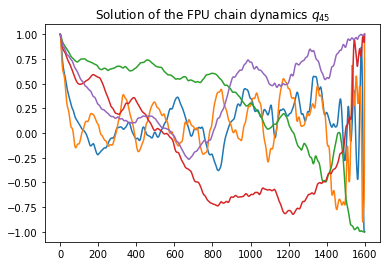

In [13]:
for i in range(5):
    plt.plot(acf(q55_store[0:sec_length*2,4*i]))
plt.title(r"Solution of the FPU chain dynamics $q_{45}$")